# PCA of Spotify Dataset
Looking at the primary two components of the Spotify dataset used in the project

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from zipfile import ZipFile 

In [25]:
with ZipFile("data/datasets.zip") as z:
    df = pd.read_csv(z.open(z.infolist()[0].filename))
#     df_artist = pd.read_csv(z.open(z.infolist()[1].filename))
#     df_avg_genre = pd.read_csv(z.open(z.infolist()[2].filename))
#     df_yr = pd.read_csv(z.open(z.infolist()[3].filename))
    df_genre = pd.read_csv(z.open(z.infolist()[4].filename))

In [50]:
df_genre = df_genre[['artists', 'genres']]

# unpack lists in the Artists column, retain the first artist of the list
df['artists'] = df['artists'].str.slice(1,-1).str.split(',')
df['artists'] = df['artists'].map(lambda x: x[0])
df['artists'] = df['artists'].str.slice(1,-1)

merged =df.merge(df_genre, on='artists')
# Keep rows within 'rock' genre
rock_df =merged[merged['genres'].str.contains('rock')]

In [27]:
# drop irrelevant features
rock_df.drop(['artists', 'id', 'name', 'release_date', 'genres', 'year', 'explicit', 'mode', 'key'], axis=1, inplace=True)

/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
rock_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
5969,0.872000,0.571,155893,0.204,0.779000,0.1970,-18.610,0,0.0328,129.289,0.0932
5970,0.576000,0.859,223373,0.407,0.000000,0.1430,-15.889,28,0.0762,106.008,0.9250
5971,0.698000,0.670,256000,0.281,0.000029,0.0875,-16.884,30,0.1160,134.335,0.3480
5972,0.102000,0.655,179093,0.690,0.000118,0.1150,-12.698,30,0.0370,156.482,0.9610
5973,0.128000,0.534,217173,0.439,0.003500,0.3340,-12.115,22,0.1310,82.863,0.6060
...,...,...,...,...,...,...,...,...,...,...,...
169045,0.927000,0.535,161472,0.234,0.565000,0.0937,-16.826,54,0.0448,182.078,0.5610
169047,0.182000,0.519,224714,0.809,0.510000,0.0951,-6.074,57,0.0646,111.986,0.2840
169049,0.010400,0.570,233173,0.803,0.000351,0.0945,-6.290,55,0.0280,110.767,0.6080
169050,0.000559,0.519,240640,0.724,0.000370,0.1200,-7.301,56,0.0303,135.051,0.4670


In [29]:
# Standardize the Data
x = StandardScaler().fit_transform(rock_df)
x

array([[ 1.86682756,  0.29840607, -0.84258091, ..., -0.42921716,
         0.24774001, -1.85355362],
       [ 0.89894013,  2.21166848, -0.13831107, ...,  0.3612258 ,
        -0.5571242 ,  1.49202362],
       [ 1.29786671,  0.95609002,  0.20220779, ...,  1.08610207,
         0.4221889 , -0.82872423],
       ...,
       [-0.95050964,  0.29176279, -0.03603121, ..., -0.51663943,
        -0.39259739,  0.21702003],
       [-0.98268863, -0.04704409,  0.04189977, ..., -0.47474959,
         0.44694225, -0.35009513],
       [-0.71965541, -0.23969899, -0.19829089, ...,  3.32629757,
         1.179517  , -0.92123238]])

In [31]:
# Instantiate PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6',
                                                                  'pricipal component 7', 'pricipal component 8',
                                                                 'pricipal component 9', 'pricipal component 10',
                                                                 'pricipal component 11'])

In [47]:
# percent of variance explained by each PCA
pca.explained_variance_ratio_

array([0.23651088, 0.15996502, 0.11422631, 0.09197461, 0.09069164,
       0.0812919 , 0.07338232, 0.06404606, 0.04117173, 0.03352615,
       0.01321337])

In [48]:
# variance explained by each PCA
pca.explained_variance_

array([2.60166675, 1.75964704, 1.25651214, 1.01173905, 0.9976261 ,
       0.89422706, 0.80722011, 0.70451944, 0.45289721, 0.36879434,
       0.14534965])

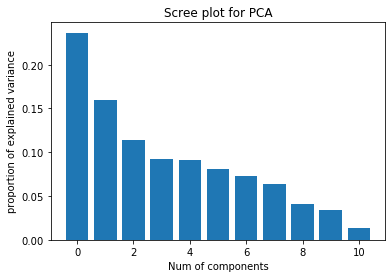

In [36]:
index = np.arange(11)
plt.bar(index, pca.explained_variance_ratio_);
plt.title('Scree plot for PCA');
plt.xlabel('Num of components');
plt.ylabel('proportion of explained variance');

In [38]:
# look at first PC
pc1 = pca.components_[0]
pc2 = pca.components_[1]
list(zip(pc1, rock_df.columns))

[(0.494897398870004, 'acousticness'),
 (-0.005499064960766131, 'danceability'),
 (-0.0685259434996188, 'duration_ms'),
 (-0.5712815935176718, 'energy'),
 (0.049816370302982166, 'instrumentalness'),
 (-0.10343840630243312, 'liveness'),
 (-0.5189797165426626, 'loudness'),
 (-0.2360649061929458, 'popularity'),
 (-0.12968903540885415, 'speechiness'),
 (-0.20086770426966566, 'tempo'),
 (-0.169035557089845, 'valence')]

In [45]:
# Look at second PC
list(zip(pc2, rock_df.columns))

[(-0.06544128090065902, 'acousticness'),
 (-0.6009126242192172, 'danceability'),
 (0.4032645710377336, 'duration_ms'),
 (0.007045946444232731, 'energy'),
 (0.2577920715675768, 'instrumentalness'),
 (0.2548649212813049, 'liveness'),
 (-0.030963505314313244, 'loudness'),
 (0.027000951138425794, 'popularity'),
 (0.08205997654570868, 'speechiness'),
 (0.10277270128988297, 'tempo'),
 (-0.5670562221022281, 'valence')]

### Eigen Values & Loadings PC1
**Interpretation:** acousticness, energy, and loudness have strong relationships with PC1, indicating that they have a higher impact on variability than the other features. Acousticness and Instrumentalness are positively correlated with PC1, while the rest of the features have a negative correlation with PC1.<br>
**Name:** Chill Beats

In [49]:
# eigen values
eig_values = pca.explained_variance_

# get the loadings for PC1
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=rock_df.columns)
str_loading_1.sort_values(ascending=False)

acousticness        0.798254
instrumentalness    0.080352
danceability       -0.008870
duration_ms        -0.110530
liveness           -0.166843
speechiness        -0.209184
valence            -0.272649
tempo              -0.323993
popularity         -0.380765
loudness           -0.837098
energy             -0.921459
dtype: float64

### Eigen Values & Loadings PC2
**Interpretation:** Duration, valence, and danceability have strong relationships with PC2, indicating that they have a higher impact on variability than the other features. Loudness, acousticness, valence, and danceability are negatively correlated with PC1, while the rest of the features have a positive correlation with PC2.<br>
**Name** Music 2 Cry to

In [44]:
# get the loadings for PC2
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=rock_df.columns)
str_loading_2.sort_values(ascending=False)

duration_ms         0.534937
instrumentalness    0.341966
liveness            0.338083
tempo               0.136330
speechiness         0.108854
popularity          0.035817
energy              0.009347
loudness           -0.041074
acousticness       -0.086809
valence            -0.752210
danceability       -0.797121
dtype: float64